# Demo simulations

In [1]:
import pickle
import matplotlib as plt
import sys
sys.path.append('../utils')
import warnings
from basie_class import *

Let's have two patients with different ground truth psychometric functions. This is set by deciding
- the probability at the SRT
- SNR at the threshold
- slope at the threshold
- miss probability
- guess probability
- distribution (logistic, gaussian, weibull)

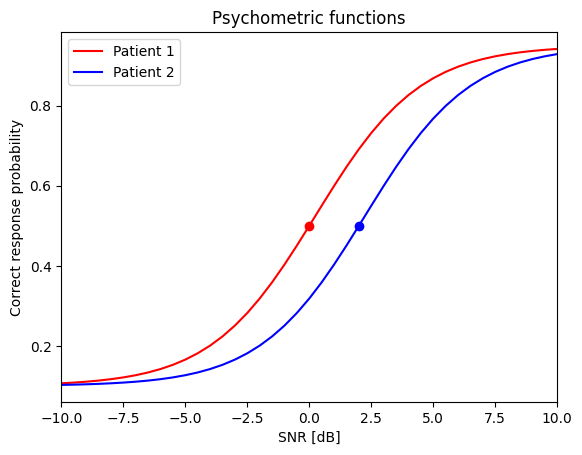

In [107]:
patient1 = np.array([[0.5], [0], [0.1], [0.05], [0.1], [1]])
patient2 = np.array([[0.5], [2], [0.1], [0.05], [0.1], [1]])
availsnr=np.atleast_2d(np.linspace(-10, 10, 41)).T
vpatient1, x1=v_psychofunc('c', patient1,availsnr)
vpatient2, x2=v_psychofunc('c', patient2, availsnr)

plt.plot(x1,vpatient1, 'r')
plt.plot(x2,vpatient2, 'b', patient2[1],patient2[0], 'bo')
plt.xlabel('SNR [dB]')
plt.ylabel('Correct response probability')
plt.title('Psychometric functions')
plt.legend(['Patient 1', 'Patient 2']);
plt.xlim([availsnr[0], availsnr[-1]])
plt.plot(patient1[1],patient1[0],'ro');

Now let's run our estimation process - based on the ground truth

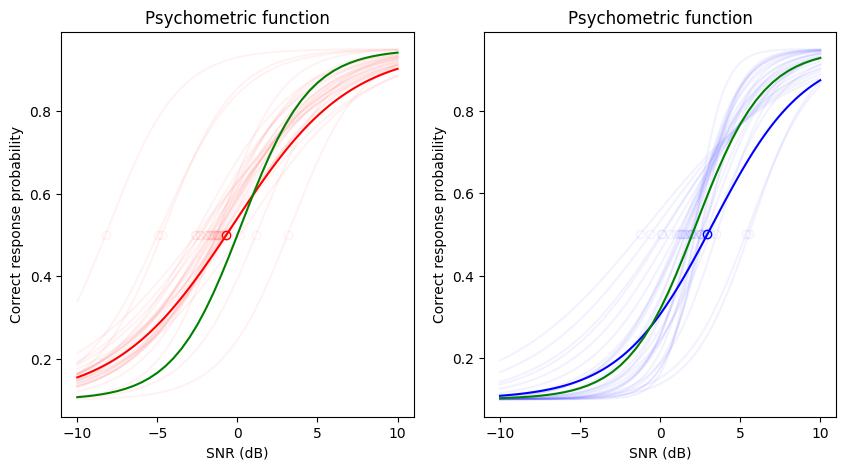

In [153]:
# warnings.filterwarnings('ignore')
np.set_printoptions(precision=3)
#[thresh miss guess minsnr maxsnr minslope maxslope]
modelp = np.array([[0.5], [0.05], [0.1], [-10], [10], [0], [0.5]])
nmodels=modelp.shape[1]
availsnr=np.linspace(-10, 10, 21).T

patient1estimate=basie_estimator()
patient2estimate=basie_estimator()

extraparams={'cs': 1}
[snr1,_,_,_]=patient1estimate.initialise(1, modelp=modelp, availsnr=availsnr, basiep=extraparams)
[snr2,_,_,_]=patient2estimate.initialise(1, modelp=modelp, availsnr=availsnr, basiep=extraparams)

nt = 30
ii=1
# fig=plt.figure(figsize=(5,4))
fig, axes= plt.subplots(1,2, figsize=(10,5))
plt.sca(axes[0])
for i in range(nt):
    [response1, __] = v_psychofunc('r',patient1,np.array([snr1]));
    [snr1, ii, m, v] =patient1estimate.update(ii, probesnr=snr1, response=response1, robust=False)

    patient1estimate.plot('f', 1)
    if i>0:
        plt.gca().lines[2*i-2].set_alpha(0.05)
        plt.gca().lines[2*i-1].set_alpha(0.05)
plt.gca().lines[-1].set_color('r')
plt.gca().lines[-2].set_color('r')
plt.plot(x1,vpatient1, 'g')

plt.sca(axes[1])
for i in range(nt):
    [response2, __] = v_psychofunc('r',patient2,np.array([snr2]));
    [snr2, ii, m, v] =patient2estimate.update(ii, probesnr=snr2, response=response2, robust=False)

    patient2estimate.plot('f', 1)
    if i>0:
        plt.gca().lines[2*i-2].set_alpha(0.05)
        plt.gca().lines[2*i-2].set_color('b')
        plt.gca().lines[2*i-1].set_alpha(0.05)
        plt.gca().lines[2*i-1].set_color('b')
plt.gca().lines[-1].set_color('b')
plt.gca().lines[-2].set_color('b')
plt.plot(x2,vpatient2, 'g');


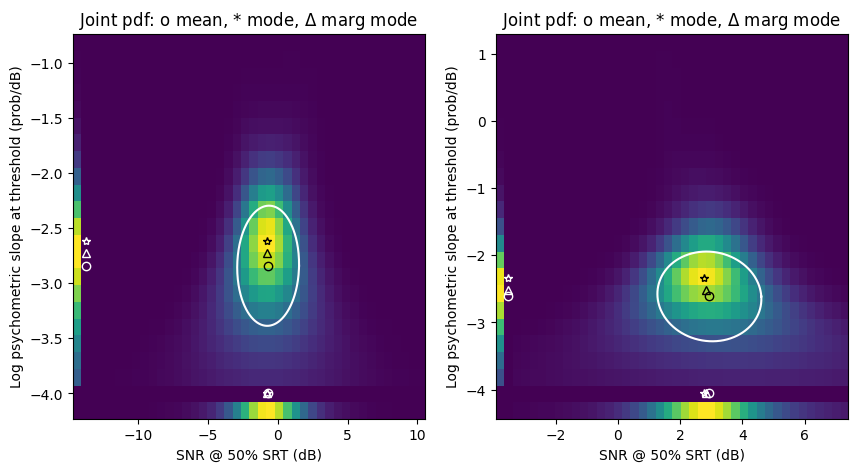

In [154]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
plt.sca(axes[0])
patient1estimate.plot('p',1)
# plt.xlim([-5,5])
plt.sca(axes[1])
patient2estimate.plot('p',1)
# plt.xlim([0,5])

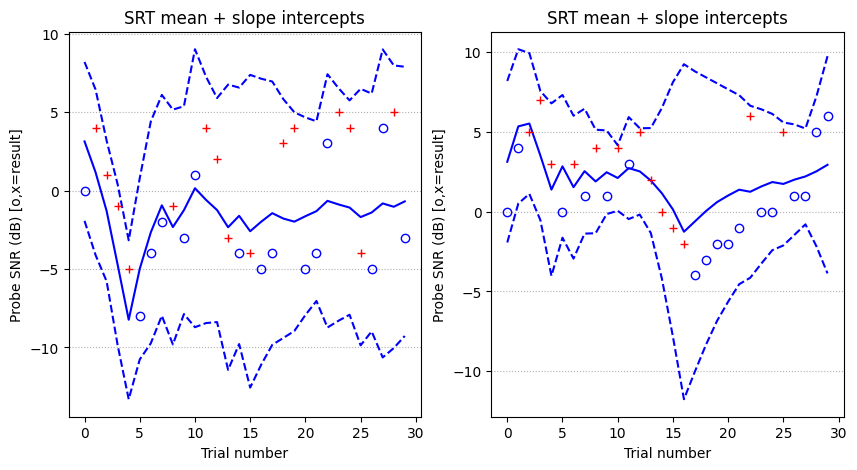

In [155]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
plt.sca(axes[0])
patient1estimate.plot('h',1)
plt.sca(axes[1])
patient2estimate.plot('h',1)
